# Mini Project: Machine Learning

Build a machine learning model that predicts the type of people who survived the Titanic shipwreck using passenger data (i.e. name, age, gender, socio-economic class, etc.). 

Dataset Link: https://www.kaggle.com/competitions/titanic/data

## Importing Initial Libraries

In [2]:
# data analysis libraries
import numpy as np
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Importing the Datasets

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_res = pd.read_csv("gender_submission.csv")


## Dataset Observation

In [4]:
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Dataset Visualization

<Axes: xlabel='Age', ylabel='Fare'>

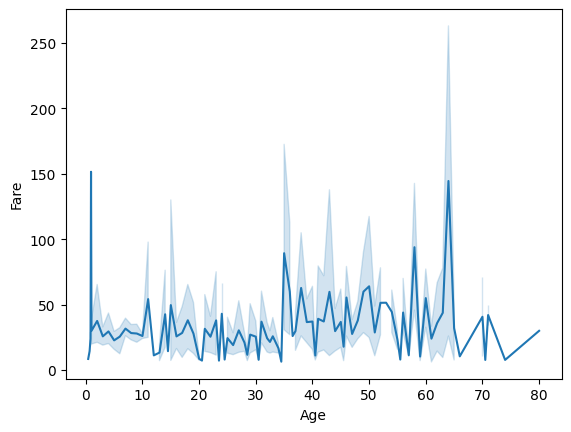

In [6]:
sns.lineplot(data=df_train, x='Age', y='Fare')


<Axes: xlabel='Sex', ylabel='Fare'>

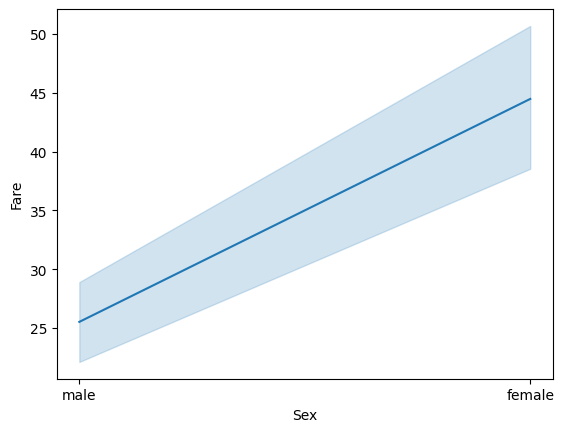

In [7]:
sns.lineplot(data=df_train, x='Sex', y='Fare')


<Axes: xlabel='Pclass', ylabel='Fare'>

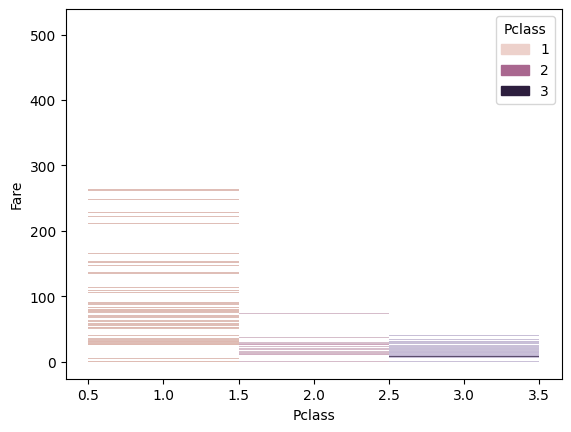

In [8]:
sns.histplot(data=df_train, x='Pclass', y='Fare', bins=3,
             hue='Pclass', stat='percent', discrete=True)


<Axes: xlabel='Age', ylabel='Fare'>

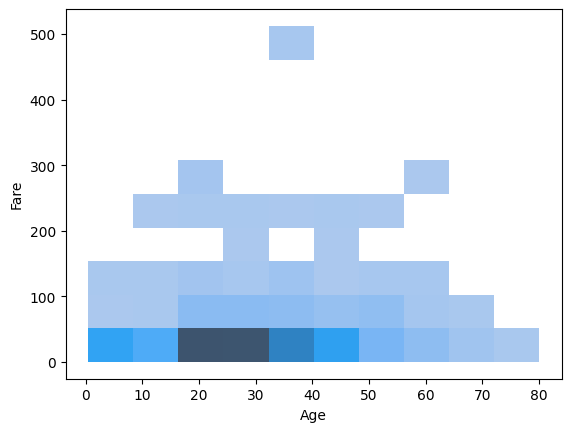

In [9]:
sns.histplot(data=df_train, x='Age', y='Fare', bins=10)


<Axes: xlabel='Age', ylabel='Fare'>

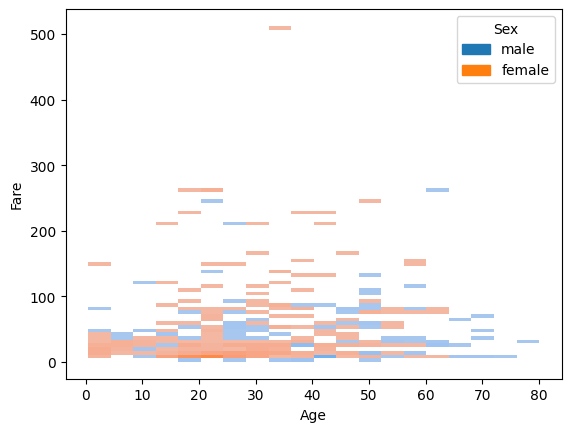

In [10]:
sns.histplot(data=df_train, x='Age', y='Fare', hue='Sex')


<Axes: xlabel='Sex', ylabel='Fare'>

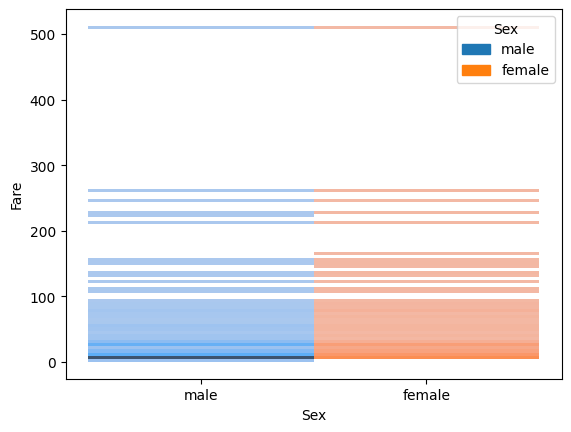

In [11]:
sns.histplot(data=df_train, x='Sex', y='Fare', hue='Sex')


<Axes: >

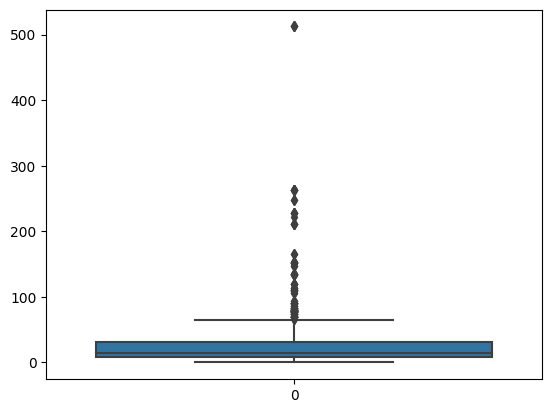

In [12]:
sns.boxplot(data=df_train['Fare'])


<Axes: xlabel='Age'>

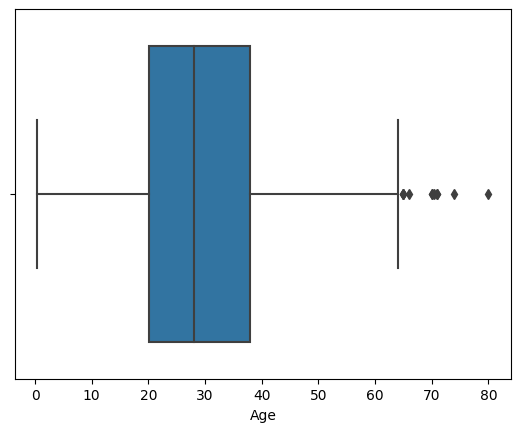

In [13]:
sns.boxplot(x=df_train['Age'])
# Boxplot for Age of Passengers
# Most passengers age lies between 20-38


<Axes: >

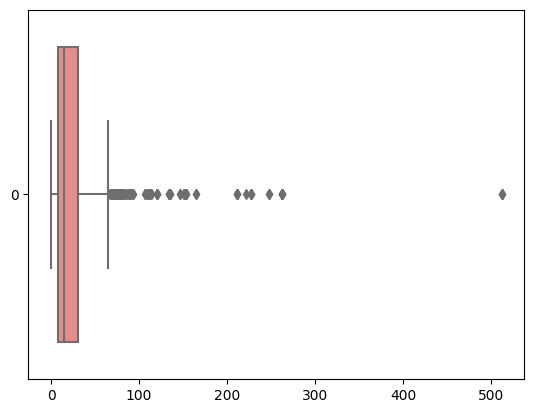

In [14]:
sns.boxplot(data=df_train['Fare'], orient='h', color='lightcoral')
# Boxplot for Fare
# Represents the distribution of Fare
# Fare lies between 1-30(approx.)


<Axes: xlabel='Age', ylabel='Sex'>

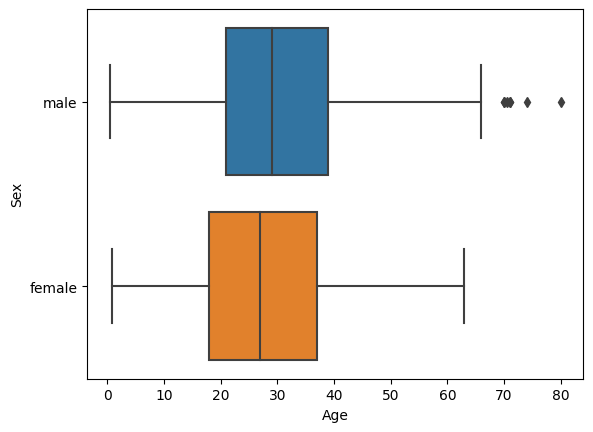

In [15]:
sns.boxplot(data=df_train, x='Age', y='Sex', orient='h')
# Age vs Sex boxplot to determine the outliers with respect to sex


<Axes: xlabel='Fare', ylabel='Sex'>

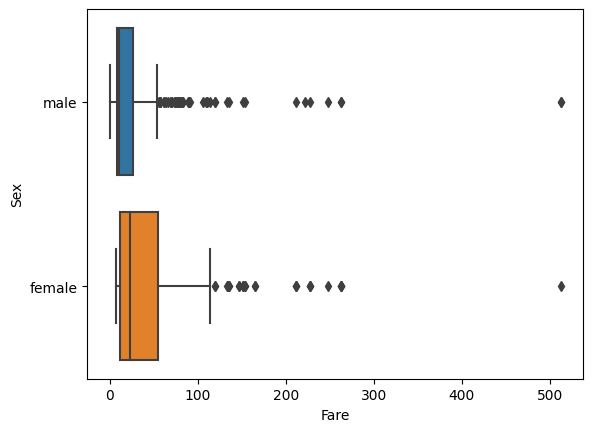

In [16]:
sns.boxplot(data=df_train, x='Fare', y='Sex', orient='h')
# Boxplot for Fare vs Sex
# Fare lies between 1-30(approx.)


<Axes: xlabel='Age', ylabel='Pclass'>

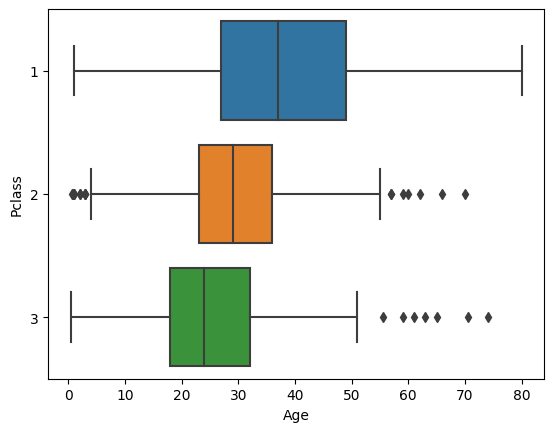

In [17]:
sns.boxplot(data=df_train, x="Age", y='Pclass', orient='h')
# Boxplot for Class vs Age
# Older people prefer good amenities


<Axes: xlabel='Fare', ylabel='Pclass'>

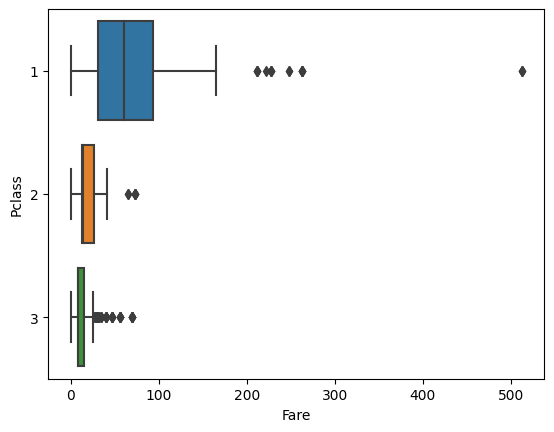

In [18]:
sns.boxplot(data=df_train, x="Fare", y='Pclass', orient='h')
# Boxplot for Fare vs Class
# Higher the Class, Higher the Fare


<Axes: xlabel='Age', ylabel='Survived'>

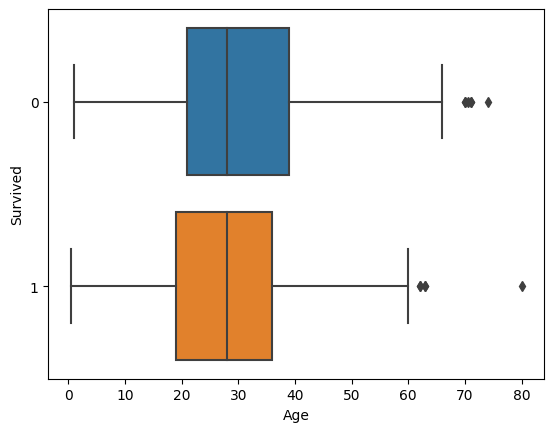

In [19]:
sns.boxplot(data=df_train, x="Age", y='Survived', orient='h')
# Boxplot for Survived vs Age


<Axes: xlabel='Age', ylabel='Pclass'>

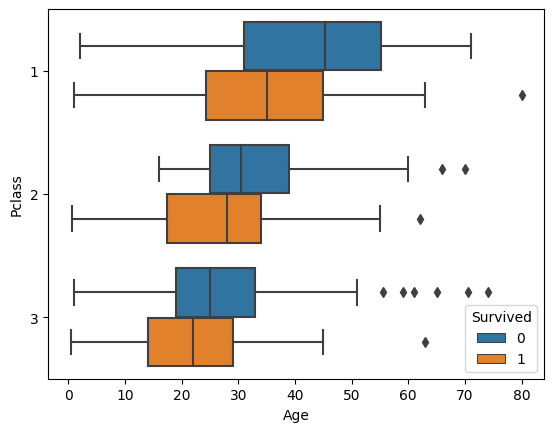

In [20]:
sns.boxplot(data=df_train, x="Age", y='Pclass', orient='h', hue='Survived')
# Boxplot for Age vs Class with Survived details
# Scatteredness:
#     1. The 'Third' class has less scattered age group
#     2. The 'First' class is more scttered
# Skewness:
#     1. Positively Skewed: Second(S0), Third(S0)
#     2. Negativewly Skewed: First(S0), First(S1), Second(S1), Third(S1)
# Outliers:
#     1. The 'First' class has only one person aged 80+ who survived
#     2. The 'Second' class has two people aged 60+ one of whom survived
#     3. Unfortunately 6 out of 7 people of the 'Third' class couldn't survive all of whom were aged between 55-80


<Axes: xlabel='Age', ylabel='Sex'>

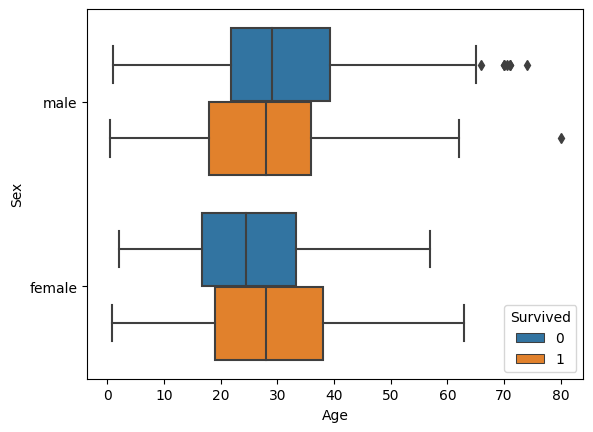

In [21]:
sns.boxplot(data=df_train, x="Age", y='Sex', orient='h', hue='Survived')
# Boxplot for Age vs Sex with Survived details
# Scatteredness:
#     1. Both male and female passengers are evenly scattered by age
# Skewness:
#     1. Positively Skewed: Male(S0), Female(S0), Female(S1)
#     2. Negatively Skewed: Male(S1)
# Outliers:
#     1. The Females have no outliers
#     2. Unfortunately 5 out of 6 Males aged 65+ couldn't make it out of the sinking ship


<Axes: xlabel='Survived', ylabel='count'>

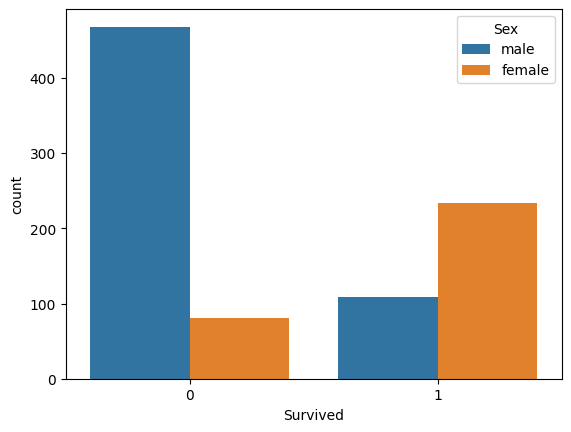

In [22]:
sns.countplot(x='Survived', data=df_train, hue='Sex')


<Axes: xlabel='Survived', ylabel='count'>

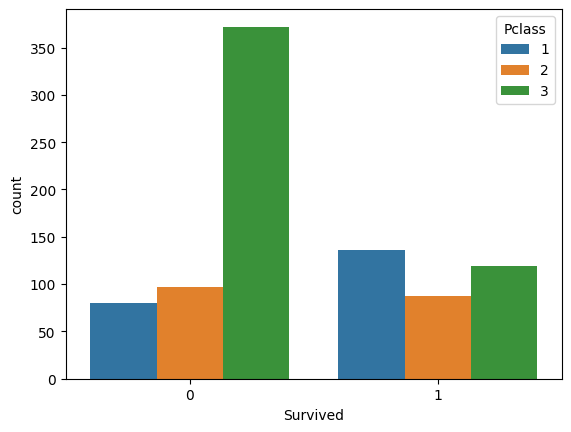

In [23]:
sns.countplot(x='Survived', data=df_train, hue='Pclass')


<Axes: ylabel='Frequency'>

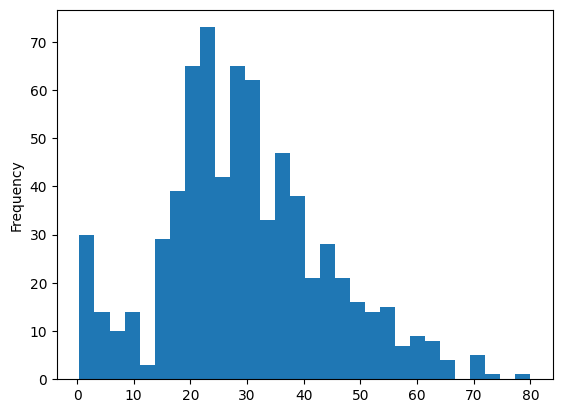

In [24]:
df_train['Age'].dropna().plot.hist(bins=30)


Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


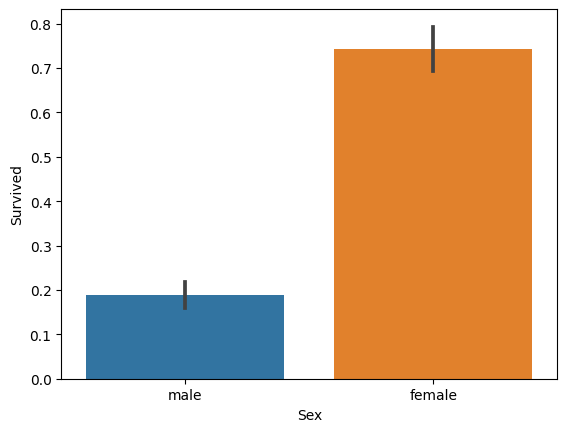

In [25]:
# draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=df_train)

# print percentages of females vs. males that survive
print("Percentage of females who survived:",
      df_train["Survived"][df_train["Sex"] == 'female'].value_counts(normalize=True)[1]*100)

print("Percentage of males who survived:",
      df_train["Survived"][df_train["Sex"] == 'male'].value_counts(normalize=True)[1]*100)


Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


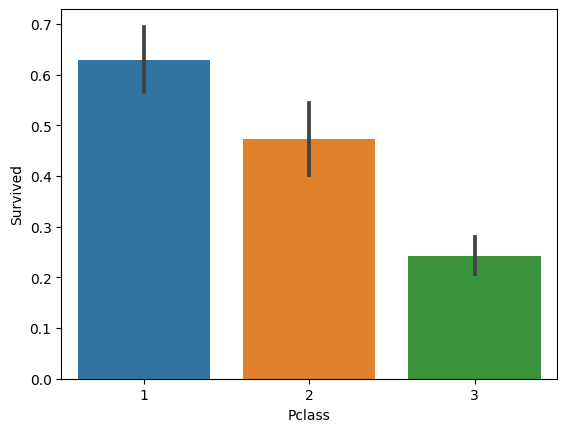

In [26]:
# draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=df_train)

# print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:",
      df_train["Survived"][df_train["Pclass"] == 1].value_counts(normalize=True)[1]*100)

print("Percentage of Pclass = 2 who survived:",
      df_train["Survived"][df_train["Pclass"] == 2].value_counts(normalize=True)[1]*100)

print("Percentage of Pclass = 3 who survived:",
      df_train["Survived"][df_train["Pclass"] == 3].value_counts(normalize=True)[1]*100)


Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


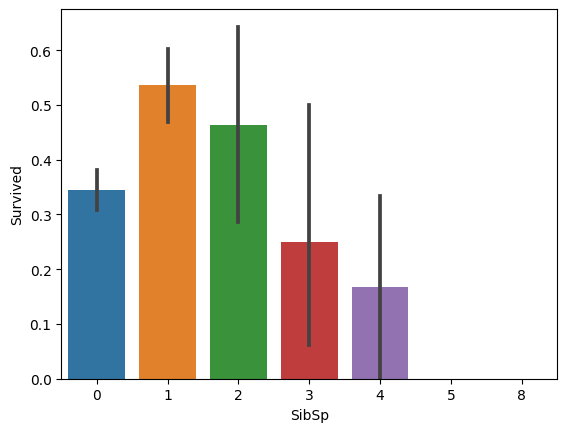

In [27]:
# draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=df_train)

# I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:",
      df_train["Survived"][df_train["SibSp"] == 0].value_counts(normalize=True)[1]*100)

print("Percentage of SibSp = 1 who survived:",
      df_train["Survived"][df_train["SibSp"] == 1].value_counts(normalize=True)[1]*100)

print("Percentage of SibSp = 2 who survived:",
      df_train["Survived"][df_train["SibSp"] == 2].value_counts(normalize=True)[1]*100)


Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


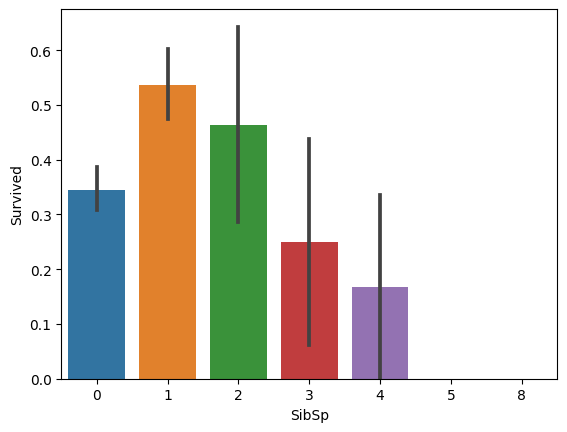

In [28]:
# draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=df_train)

# I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:",
      df_train["Survived"][df_train["SibSp"] == 0].value_counts(normalize=True)[1]*100)

print("Percentage of SibSp = 1 who survived:",
      df_train["Survived"][df_train["SibSp"] == 1].value_counts(normalize=True)[1]*100)

print("Percentage of SibSp = 2 who survived:",
      df_train["Survived"][df_train["SibSp"] == 2].value_counts(normalize=True)[1]*100)


Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


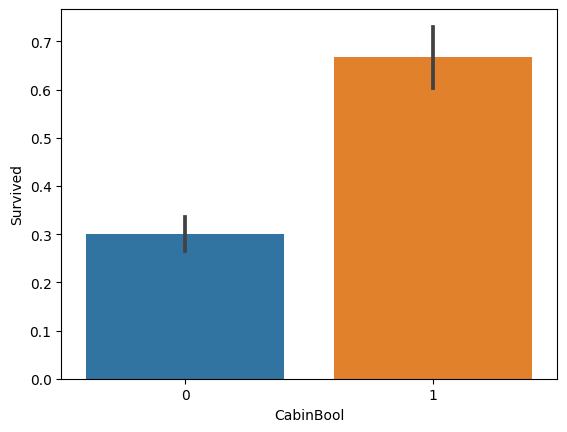

In [29]:
df_train["CabinBool"] = (df_train["Cabin"].notnull().astype('int'))
df_test["CabinBool"] = (df_test["Cabin"].notnull().astype('int'))

# calculate percentages of CabinBool vs. survived
print("Percentage of CabinBool = 1 who survived:",
      df_train["Survived"][df_train["CabinBool"] == 1].value_counts(normalize=True)[1]*100)

print("Percentage of CabinBool = 0 who survived:",
      df_train["Survived"][df_train["CabinBool"] == 0].value_counts(normalize=True)[1]*100)
# draw a bar plot of CabinBool vs. survival
sns.barplot(x="CabinBool", y="Survived", data=df_train)
plt.show()


Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


<Axes: xlabel='Embarked', ylabel='count'>

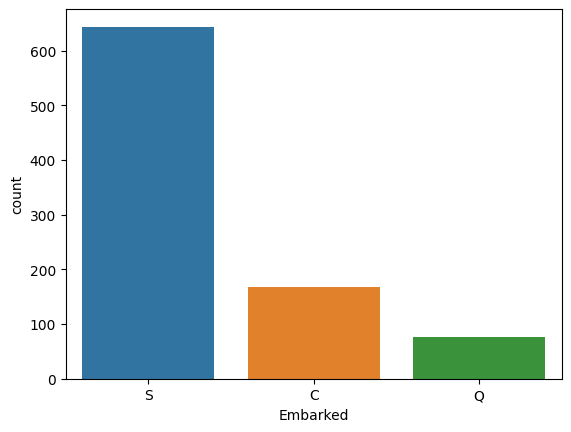

In [30]:
# now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = df_train[df_train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = df_train[df_train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = df_train[df_train["Embarked"] == "Q"].shape[0]
print(queenstown)

sns.countplot(data=df_train, x='Embarked')


## Dataset Preprocessing

In [31]:
df_train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
CabinBool        0
dtype: int64

In [32]:
df_test.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
CabinBool        0
dtype: int64

In [33]:
test_ids = df_test['PassengerId']


In [34]:
def clean(df):
    df.drop(['Name', 'Cabin', 'Ticket', 'PassengerId'], axis=1, inplace=True)
    cols = ['SibSp', 'Parch', 'Age', 'Fare']
    for col in cols:
        df[col].fillna(df[col].median(), inplace=True)
    df['Embarked'].fillna('U', inplace=True)
    return df


df_train = clean(df_train)
df_test = clean(df_test)


In [35]:
df_train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [36]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cols = ['Sex', 'Embarked']

for col in cols:
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col])


In [37]:
df_train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool
0,0,3,1,22.0,1,0,7.2500,2,0
1,1,1,0,38.0,1,0,71.2833,0,1
2,1,3,0,26.0,0,0,7.9250,2,0
3,1,1,0,35.0,1,0,53.1000,2,1
4,0,3,1,35.0,0,0,8.0500,2,0


## Splitting the Dataset

In [38]:
from sklearn.model_selection import train_test_split

X = df_train.drop('Survived', axis=1)
y = df_train["Survived"]


In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Training Dataset on Various Models

### Gaussian Naive Bayes Model

In [40]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X, y)
gnb_preds = gnb.predict(df_test)


In [41]:
gnb_acc = accuracy_score(df_res['Survived'], gnb_preds)
print("Accuracy Score for Gaussizn Naive Bayes Classifier: ",
      gnb_acc)


Accuracy Score for Gaussizn Naive Bayes Classifier:  0.7966507177033493


In [42]:
print("Classification Report for Guassian Naive Bayes Classifier: ")
print(classification_report(df_res['Survived'], gnb_preds))


Classification Report for Guassian Naive Bayes Classifier: 
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       266
           1       0.70      0.76      0.73       152

    accuracy                           0.80       418
   macro avg       0.78      0.79      0.78       418
weighted avg       0.80      0.80      0.80       418



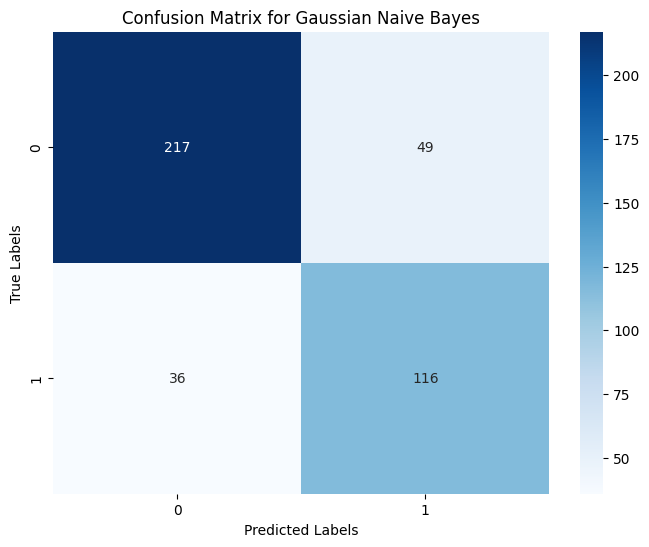

In [43]:
cm = confusion_matrix(df_res['Survived'], gnb_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Gaussian Naive Bayes")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

lrm = LogisticRegression(max_iter=10000)
lrm.fit(X, y)
lrm_preds = lrm.predict(df_test)


In [45]:
lrm_acc = accuracy_score(df_res['Survived'], lrm_preds)
print("Accuracy Score for Logistic Regression Model: ",
      lrm_acc)


Accuracy Score for Logistic Regression Model:  0.9330143540669856


In [46]:
print("Classification Report for Logistic Regression: ")
print(classification_report(df_res['Survived'], lrm_preds))


Classification Report for Logistic Regression: 
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       266
           1       0.89      0.93      0.91       152

    accuracy                           0.93       418
   macro avg       0.92      0.93      0.93       418
weighted avg       0.93      0.93      0.93       418



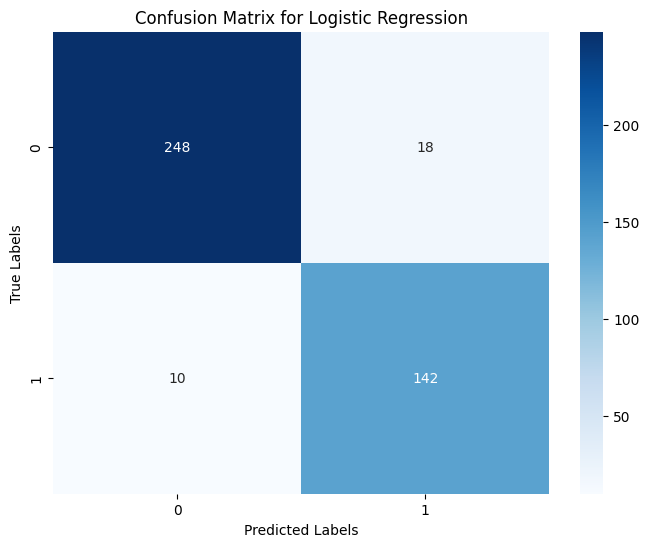

In [47]:
cm = confusion_matrix(df_res['Survived'], lrm_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Support Vector Machine (SVM) Classifier

In [48]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', random_state=0)
svc.fit(X, y)
svc_preds = svc.predict(df_test)


In [49]:
svc_acc = accuracy_score(df_res['Survived'], svc_preds)
print("Accuracy Score for SVM Model: ",
      svc_acc)


Accuracy Score for SVM Model:  1.0


In [50]:
print("Classification Report for SVM Classifier: ")
print(classification_report(df_res['Survived'], svc_preds))


Classification Report for SVM Classifier: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



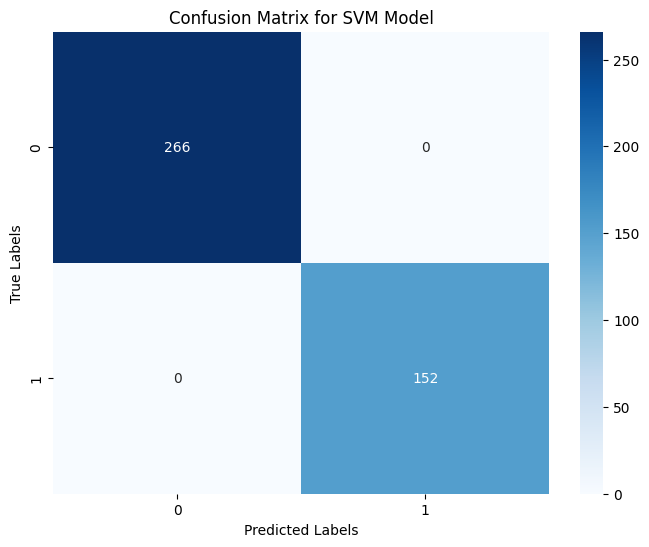

In [51]:
cm = confusion_matrix(df_res['Survived'], svc_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for SVM Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Linear SVC

In [52]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC(dual='auto')
lsvc.fit(X, y)
lsvc_preds = lsvc.predict(df_test)


In [53]:
lsvc_acc = accuracy_score(df_res['Survived'], lsvc_preds)
print("Accuracy Score for Linear SVC Model: ",
      lsvc_acc)


Accuracy Score for Linear SVC Model:  0.9545454545454546


In [54]:
print("Classification Report for Linear SVC Classifier: ")
print(classification_report(df_res['Survived'], lsvc_preds))


Classification Report for Linear SVC Classifier: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       266
           1       0.93      0.95      0.94       152

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



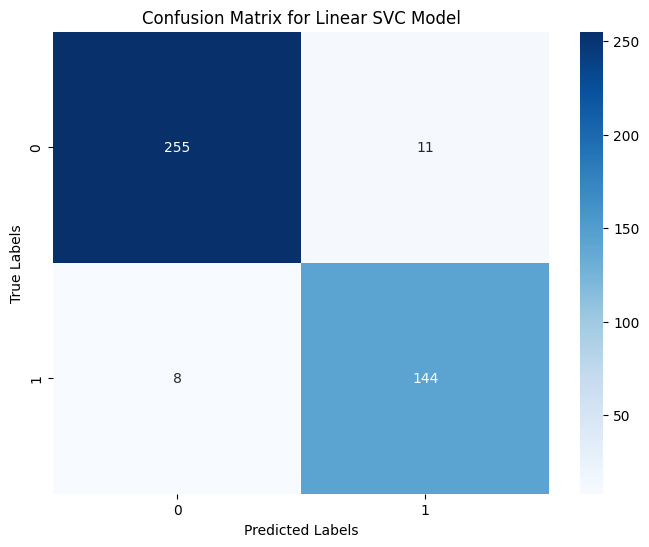

In [55]:
cm = confusion_matrix(df_res['Survived'], lsvc_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Linear SVC Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=300, max_depth=8)
rfc.fit(X, y)
rfc_preds = rfc.predict(df_test)


In [57]:
rfc_acc = accuracy_score(df_res['Survived'], rfc_preds)
print("Accuracy Score for Random Forest Model: ",
      rfc_acc)


Accuracy Score for Random Forest Model:  0.8564593301435407


In [58]:
print("Classification Report for Random Forest Classifier: ")
print(classification_report(df_res['Survived'], rfc_preds))


Classification Report for Random Forest Classifier: 
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       266
           1       0.83      0.76      0.79       152

    accuracy                           0.86       418
   macro avg       0.85      0.84      0.84       418
weighted avg       0.86      0.86      0.86       418



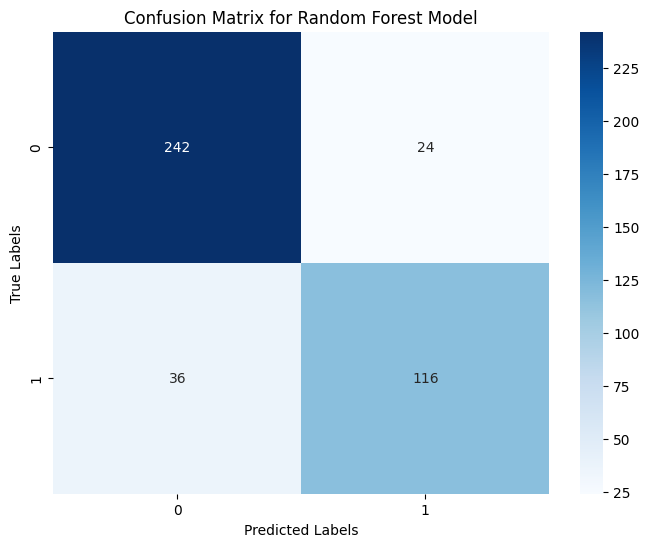

In [59]:
cm = confusion_matrix(df_res['Survived'], rfc_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Random Forest Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Perceptron


In [60]:
from sklearn.linear_model import Perceptron

pm = Perceptron()
pm.fit(X, y)
pm_preds = pm.predict(df_test)


In [61]:
pm_acc = accuracy_score(df_res['Survived'], pm_preds)
print("Accuracy Score for Perceptron Model: ", pm_acc)


Accuracy Score for Perceptron Model:  0.7368421052631579


In [62]:
print("Classification Report for Perceptron Classifier: ")
print(classification_report(df_res['Survived'], pm_preds))


Classification Report for Perceptron Classifier: 
              precision    recall  f1-score   support

           0       0.96      0.61      0.75       266
           1       0.58      0.96      0.73       152

    accuracy                           0.74       418
   macro avg       0.77      0.78      0.74       418
weighted avg       0.83      0.74      0.74       418



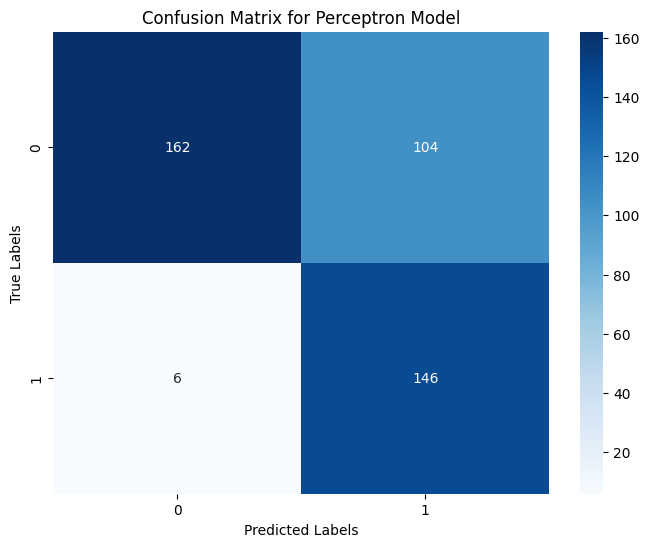

In [63]:
cm = confusion_matrix(df_res['Survived'], pm_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Perceptron Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Decision Tree Classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=10, min_samples_split=5)
dtc.fit(X, y)
dtc_preds = dtc.predict(df_test)


In [65]:
dtc_acc = accuracy_score(df_res['Survived'], dtc_preds)
print("Accuracy Score for Perceptron Model: ", dtc_acc)


Accuracy Score for Perceptron Model:  0.8253588516746412


In [66]:
print("Classification Report for Decision Tree Classifier: ")
print(classification_report(df_res['Survived'], dtc_preds))


Classification Report for Decision Tree Classifier: 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       266
           1       0.76      0.76      0.76       152

    accuracy                           0.83       418
   macro avg       0.81      0.81      0.81       418
weighted avg       0.83      0.83      0.83       418



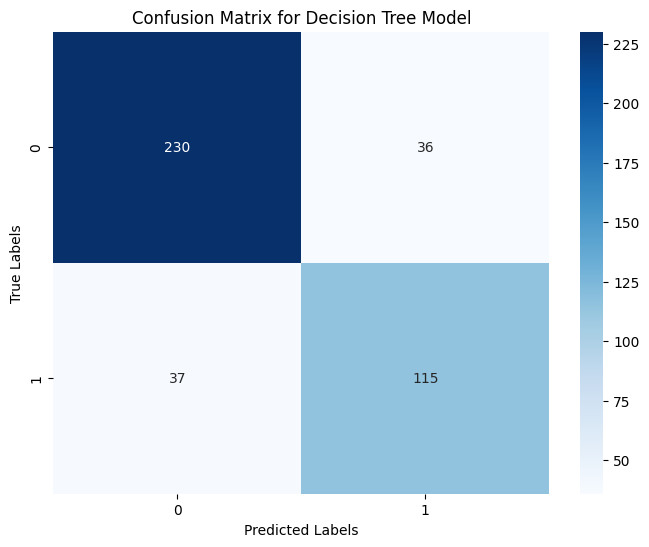

In [67]:
cm = confusion_matrix(df_res['Survived'], dtc_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Decision Tree Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### k-Nearest Neighbours (kNN)

In [68]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20, algorithm='kd_tree', n_jobs=10)
knn.fit(X, y)
knn_preds = knn.predict(df_test)


In [69]:
knn_acc = accuracy_score(df_res['Survived'], knn_preds)
print("Accuracy Score for Perceptron Model: ", knn_acc)


Accuracy Score for Perceptron Model:  0.6722488038277512


In [70]:
print("Classification Report for kNN Classifier: ")
print(classification_report(df_res['Survived'], knn_preds))


Classification Report for kNN Classifier: 
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       266
           1       0.56      0.43      0.49       152

    accuracy                           0.67       418
   macro avg       0.64      0.62      0.62       418
weighted avg       0.66      0.67      0.66       418



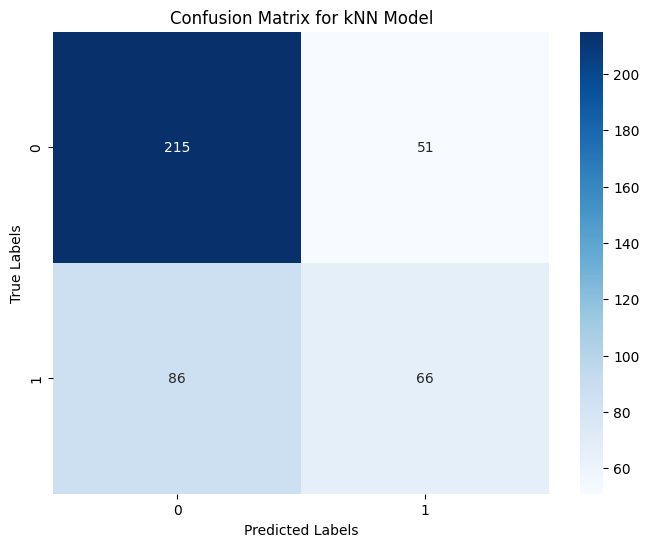

In [71]:
cm = confusion_matrix(df_res['Survived'], knn_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for kNN Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Stochastic Gradient Descent

In [72]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='modified_huber')
sgd.fit(X, y)
sgd_preds = sgd.predict(df_test)


In [73]:
sgd_acc = accuracy_score(df_res['Survived'], sgd_preds)
print("Accuracy Score for Perceptron Model: ", sgd_acc)


Accuracy Score for Perceptron Model:  0.8205741626794258


In [74]:
print("Classification Report for Stochastic Gradient Descent Classifier: ")
print(classification_report(df_res['Survived'], sgd_preds))


Classification Report for Stochastic Gradient Descent Classifier: 
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       266
           1       0.74      0.78      0.76       152

    accuracy                           0.82       418
   macro avg       0.81      0.81      0.81       418
weighted avg       0.82      0.82      0.82       418



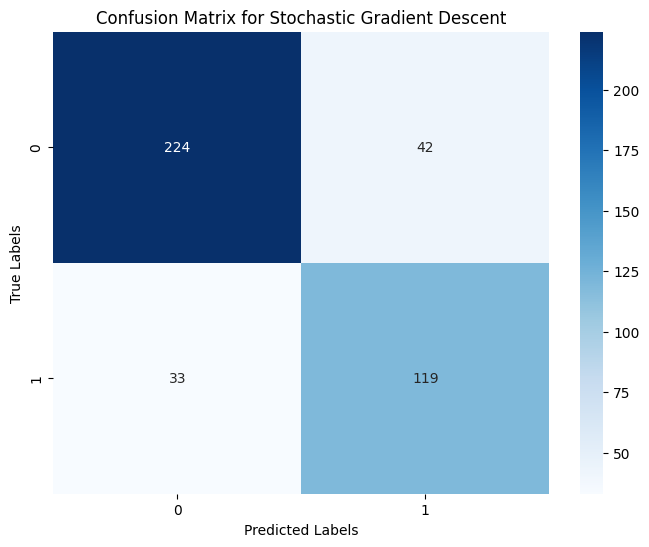

In [75]:
cm = confusion_matrix(df_res['Survived'], sgd_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Stochastic Gradient Descent")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Gradient Boosting Classifier

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(loss='exponential')
gb.fit(X, y)
gb_preds = gb.predict(df_test)


In [77]:
gb_acc = accuracy_score(df_res['Survived'], gb_preds)
print("Accuracy Score for Perceptron Model: ", gb_acc)


Accuracy Score for Perceptron Model:  0.8827751196172249


In [78]:
print("Classification Report for Gradient Boosting Classifier: ")
print(classification_report(df_res['Survived'], gb_preds))


Classification Report for Gradient Boosting Classifier: 
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       266
           1       0.87      0.80      0.83       152

    accuracy                           0.88       418
   macro avg       0.88      0.86      0.87       418
weighted avg       0.88      0.88      0.88       418



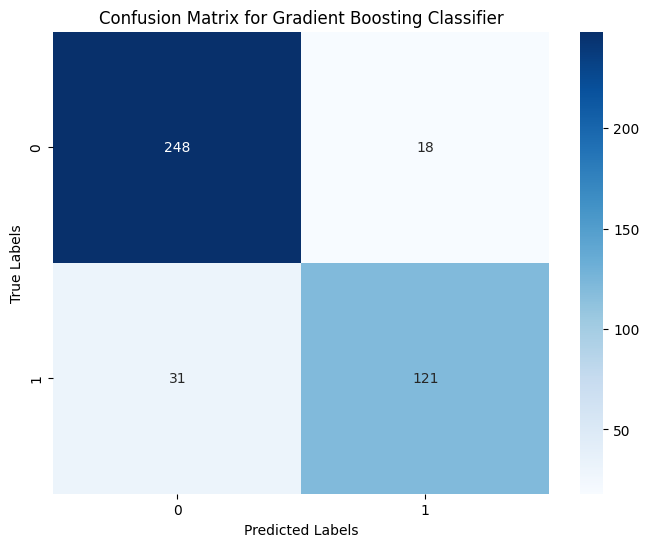

In [79]:
cm = confusion_matrix(df_res['Survived'], gb_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Gradient Boosting Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


## Comparing the Model Accuracy Scores

In [81]:
from sklearn.svm import SVC
models_accuracy_df = pd.DataFrame({
    'Model': ['Support Vector Machines', 'K-Nearest Neighbours', 'Logistic Regression',
              'Random Forest Classifier', 'Naive Bayes Classifier', 'Perceptron', 'Linear SVC',
              'Decision Tree Model', 'Stochastic Gradient Descent Model', 'Gradient Boosting Classifier'],
    'Score': [svc_acc, knn_acc, lrm_acc,
              rfc_acc, gnb_acc, pm_acc, lsvc_acc, dtc_acc,
              sgd_acc, gb_acc]})
models_accuracy_df.sort_values(by='Score', ascending=False, inplace=True)


In [82]:
models_accuracy_df


,Model,Score
0,Support Vector Machines,1.000000
6,Linear SVC,0.954545
2,Logistic Regression,0.933014
9,Gradient Boosting Classifier,0.882775
3,Random Forest Classifier,0.856459
7,Decision Tree Model,0.825359
8,Stochastic Gradient Descent Model,0.820574
4,Naive Bayes Classifier,0.796651
5,Perceptron,0.736842
1,K-Nearest Neighbours,0.672249
